# **Capillary Ascension**

**Capillary ascension plays a crucial role in porous media, where the movement of liquid through small interconnected pores is driven by surface tension and adhesive forces. This phenomenon is fundamental in various natural and industrial processes, including soil moisture retention, oil recovery, and ink absorption. The effective height and speed of liquid penetration into porous structures depend on factors such as pore size, fluid viscosity, and surface wettability**

**On top of the fluid dynamics general case, the Lucas-Washburn model provides a framework to describe and predict fluid behavior in such media, helping in the design of materials with tailored absorption properties and in optimizing fluid transport in engineering applications.**

**Altough the Lucas-Washburn method is used for the dynamic portion of the process and well accepted, we aim to find a more intuitive result that translates both equilibrium and dynamical parts of the process.**

# General Case

The capillary rise dynamics is:
$$
h\frac{d^{2}h}{dt^{2}} + (\frac{dh}{dt})^{2} + \frac{8\mu h}{\rho R^2} \frac{dh}{dt} = \frac{2\sigma\cos\theta}{\rho R} - gh
$$

## Equilibrium Condition

At equilibrium, the capillary rise reaches a maximum height where the upward capillary force balances the downward gravitational force. This equilibrium height is given by:

$$
 h_{eq} = \frac{2\sigma \cos\theta}{\rho g R}
$$

This expression shows that the equilibrium height depends on the surface tension of the liquid, the contact angle, the density of the liquid, gravitational acceleration, and the capillary radius.


## Dynamics Specific Case

Considering a constant velocity such that $\frac{d^{2}h}{dt^{2}}=0$, we have:


$$
\frac{dh}{dt}(\frac{dh}{dt}+\frac{8\mu h}{\rho R^2})=\frac{2\sigma\cos\theta}{\rho R} - gh
$$


Then, let's substitute terms of $\frac{dh}{dt}$ by $\frac{h'}{t}$, where $h'$ is the estimative of $h(t)$ that makes this substitution true. We can assume the approximation $h'=h(t)$, so that $\frac{dh}{dt}$ is substituted by the mean velocity observed until a given instant t.

---

# Dynamics Method 1

Replacing the additive term $\frac{dh}{dt}$ with an average value $\frac{h'}{t}$

$$
\frac{dh}{dt} = \frac{\frac{2\sigma\cos\theta - g\rho R}{\rho R}}{\frac{h'}{t}+\frac{8\mu h}{\rho R^2}}
$$

By manipulating the equations, we arrive at:

$$
\frac{dh}{dt} = \frac{(2\sigma\cos\theta - g\rho R)Rt}{h' \rho R^{2} + 8 \mu h t}
$$



## Dynamics Method 2

Replacing the multiplicative term $\frac{dh}{dt}$ with an average value $\frac{h'}{t}$

$$
\frac{dh}{dt} = \frac{ \frac{2\sigma\cos\theta}{\rho R} -gh}{\frac{h'}{t}}-\frac{8\mu h}{\rho R^2}
$$

By manipulating the equations, we arrive at:

$$
\frac{dh}{dt} = \frac{(2\sigma\cos\theta-gh \rho R) R t - 8 \mu h h'}{p R^{2} h'}
$$


## Dynamics Method of Lucas-Washburn

Using the classical Lucas-Washburn approach, which assumes the capillary rise is governed by the balance of viscous forces and capillary pressure, we have:

$$
\frac{dh}{dt} = \frac{\sigma R \cos\theta}{4 \mu h}
$$

Integrating both sides with respect to time:

$$
 h^2 = \frac{\sigma R \cos\theta}{2 \mu} t
$$

This equation shows that the height of the liquid in the capillary follows a square root dependence on time.

The Lucas-Washburn dynamics is quite non-intuitive, since the height is proportional to the radious of the tube.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def heq(R= 0.00001, sigma= 70*10**-7, theta= np.pi/6, rho=1000, g=9.8): return 2*sigma*np.cos(theta)/(rho*g*R)

def run(R = 0.00001,
        theta = np.pi/6,
        sigma = 70*10**-7,
        mi = 10**-3,
        rho = 1000,
        delta_t = 10**-6,
        start_t = 0,
        stop_t =  0.8,
        h0 = 10**-7):

  g = 9.8

  def h1(h,t): return (2*sigma*np.cos(theta)-g*h*rho*R)*R*t/(h*rho*R**2+8*mi*h*t)

  def h2(h,t): return ((2*sigma*np.cos(theta)-g*h*rho*R)*R*t-8*mi*h**2)/(rho*R**2*h)

  def hLW(h,t): return sigma*R*np.cos(theta)/(4*mi*h)

  h1_t = [h0]
  h2_t = [h0]
  hvisc_t = [h0]

  for t in np.arange(start_t,stop_t,delta_t):

    new_h1 = h1_t[-1] + delta_t*h1(h1_t[-1],t)
    h1_t.append(new_h1)

    new_h2 = h2_t[-1] + delta_t*h2(h2_t[-1],t)
    h2_t.append(new_h2)

    new_hvisc = hvisc_t[-1] + delta_t*hLW(hvisc_t[-1],t)
    hvisc_t.append(new_hvisc)

  h_eq = heq(sigma=sigma, theta=theta, rho=rho, R=R, g=g)

  print("\n\nAnalysing R=",R,":")
  print("\n-h_eq analitical: ", h_eq)
  print("\n-h1_eq numerical: ", h1_t[-1])
  print("--stade state error: ", ((h_eq-h1_t[-1])/h_eq)*100, "%")
  print("\n-h2_eq numerical: ", h2_t[-1])
  print("--stade state error: ", ((h_eq-h2_t[-1])/h_eq)*100, "%")

  return h1_t, h2_t, hvisc_t



Analysing R= 1e-05 :

-h_eq analitical:  0.00012371791482634838

-h1_eq numerical:  0.00012371563435798188
--stade state error:  0.0018432806353873815 %

-h2_eq numerical:  0.00011324836852139802
--stade state error:  8.462433528438877 %


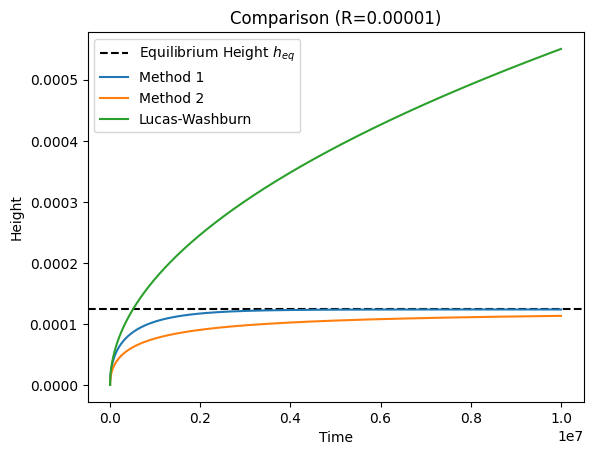

In [2]:
# Second run with R = 0.00001
h_eq = heq(R=0.00001)
plt.axhline(y=h_eq, color='k', linestyle='--', label="Equilibrium Height $h_{eq}$")
h1_t, h2_t, hvisc_t = run(R=0.00001, stop_t=10)
plt.plot(h1_t, label="Method 1")
plt.plot(h2_t, label="Method 2")
plt.plot(hvisc_t, label="Lucas-Washburn")
plt.legend(loc="upper left")
plt.title("Comparison (R=0.00001)")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()



Analysing R= 5e-05 :

-h_eq analitical:  2.4743582965269675e-05

-h1_eq numerical:  2.4743535052982392e-05
--stade state error:  0.00019363520372329013 %

-h2_eq numerical:  2.3013823156464003e-05
--stade state error:  6.9907410387314535 %


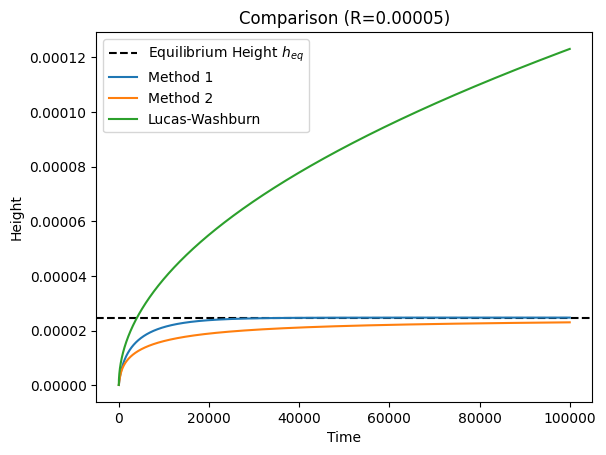

In [3]:
# Second run with R = 0.00005
h_eq = heq(R=0.00005)
plt.axhline(y=h_eq, color='k', linestyle='--', label="Equilibrium Height $h_{eq}$")
h1_t, h2_t, hvisc_t = run(R=0.00005, stop_t=0.1)
plt.plot(h1_t, label="Method 1")
plt.plot(h2_t, label="Method 2")
plt.plot(hvisc_t, label="Lucas-Washburn")
plt.legend(loc="upper left")
plt.title("Comparison (R=0.00005)")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()

# Conclusions

As we can observe, the proposed methods capture the dynamics similar to the Lucas-Washburn equation, but they also achieve the proper steady-state height. Additionally, as expected, the methods capture the effect of different radii, where a larger radius results in a higher equilibrium height.

Furthermore, in the equations, the quadratic term appears in a way that reduces the height—either by being present in the denominator or by negatively contributing in the numerator, providing a more intuitive form of analysis
